#In summary, 
this code performs data exploration, data cleaning, feature selection, and builds two different classification models (Random Forest and Logistic Regression) to classify spam emails based on various features. The accuracy of both models is evaluated using a confusion matrix.

# Import Libraries: 
Import necessary libraries like pandas, matplotlib, seaborn, and scikit-learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Dataset:
Load the email dataset from a CSV file named "spam_email_dataset.csv" into a DataFrame called E_data.

In [2]:
E_data = pd.read_csv("spam_email_dataset.csv")

In [3]:
E_data

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,cassidytaylor@example.com,Current team yet like realize American.,martinezangela@example.net,perkinsmatthew@example.org,10-04-2023,07:18,1,7,114,83,0,3,2,0,5,0
5996,lisatate@example.com,Also start certainly range great try others.,mckenzieerika@example.net,jeremy75@example.org,07-05-2023,19:45,1,5,19,10,0,0,1,7,0,0
5997,cassandravazquez@example.org,Matter issue win agent likely.,dlewis@example.org,cervanteskimberly@example.org,08-04-2023,18:49,2,10,52,45,5,3,0,10,4,0
5998,amoore@example.com,Again member father.,eperry@example.org,dana02@example.org,19-01-2023,14:00,3,2,178,76,0,1,2,11,1,1


# Data Exploration:

Use E_data.info() to get information about the dataset, including data types and missing values.

In [4]:
E_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

# 
Check for missing values using E_data.isnull().sum().

In [5]:
E_data.isnull().sum()

Email                0
Subject              0
Sender               0
Recipient            0
Date                 0
Time                 0
Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
Spam Indicator       0
dtype: int64

Visualize missing values using a heatmap with sns.heatmap.

<AxesSubplot:>

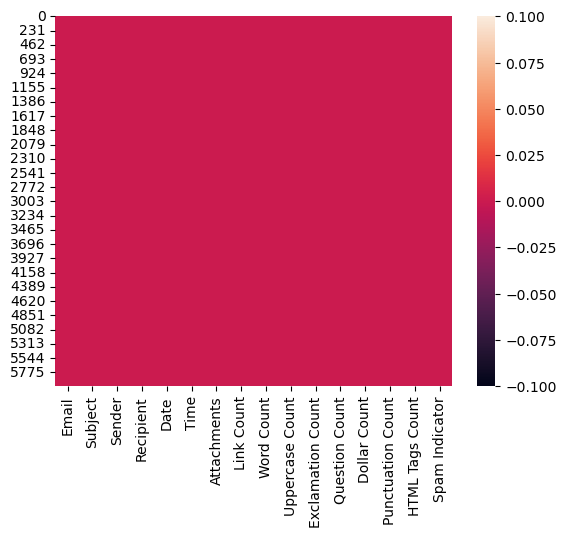

In [6]:
sns.heatmap(E_data.isnull())

<AxesSubplot:>

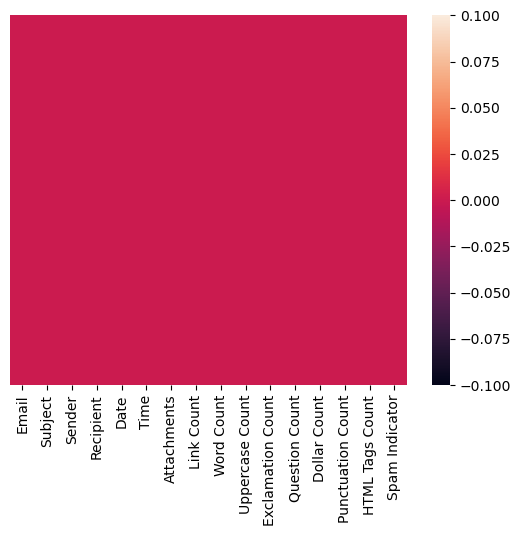

In [7]:
sns.heatmap(E_data.isnull(),yticklabels=False)

Explore the dataset by plotting counts of different features against the 'Spam Indicator' using sns.countplot. This helps understand how various features relate to whether an email is spam or not.

<AxesSubplot:xlabel='Email', ylabel='count'>

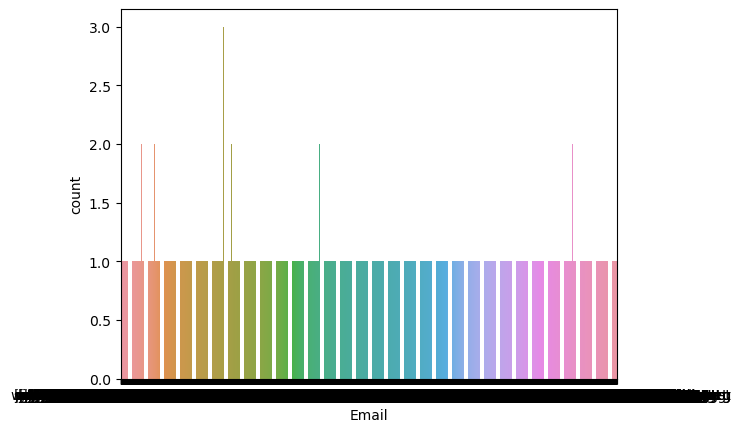

In [8]:
sns.countplot(data=E_data ,x='Email')

<AxesSubplot:xlabel='Email', ylabel='count'>

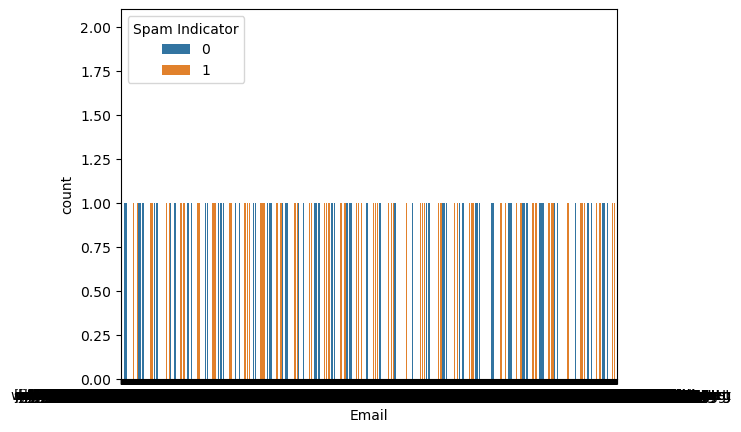

In [9]:
sns.countplot(data=E_data ,x='Email', hue ='Spam Indicator')

<AxesSubplot:xlabel='Subject', ylabel='count'>

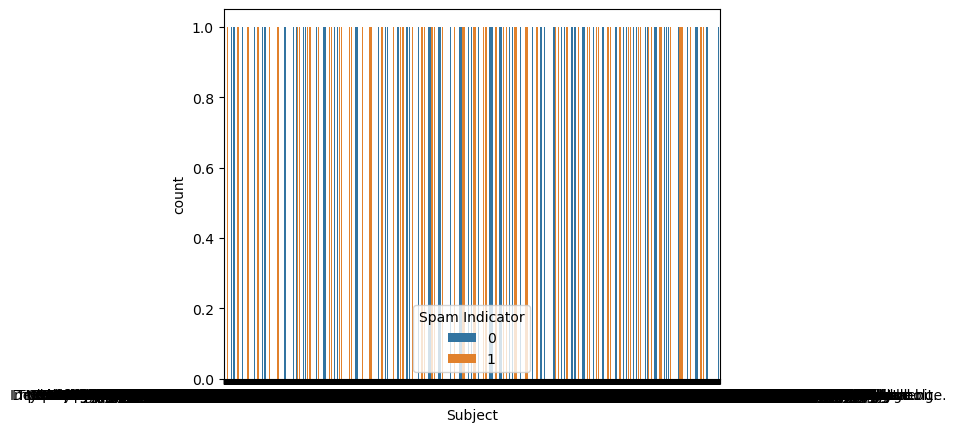

In [10]:
sns.countplot(data=E_data ,x='Subject', hue ='Spam Indicator')

<AxesSubplot:xlabel='Sender', ylabel='count'>

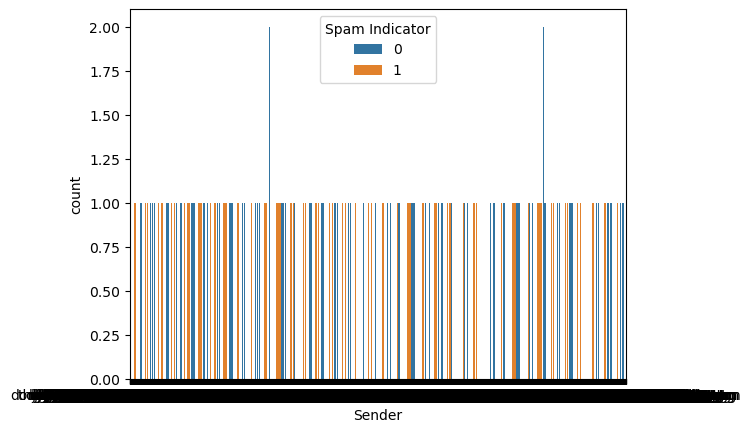

In [11]:
sns.countplot(data=E_data ,x='Sender', hue ='Spam Indicator')

<AxesSubplot:xlabel='Recipient', ylabel='count'>

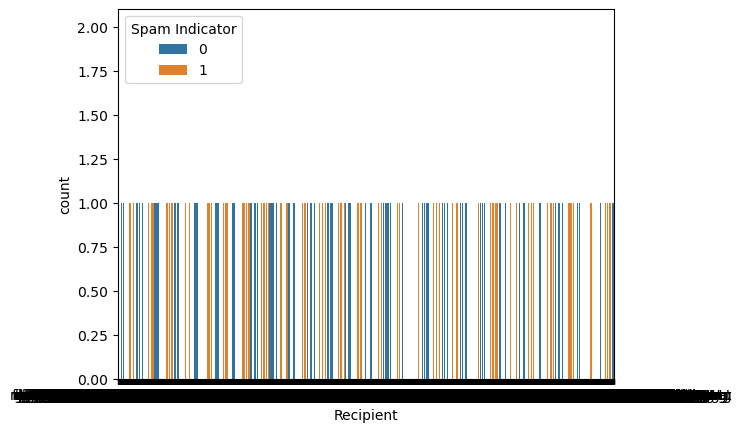

In [12]:
sns.countplot(data=E_data ,x='Recipient', hue ='Spam Indicator')

<AxesSubplot:xlabel='Time', ylabel='count'>

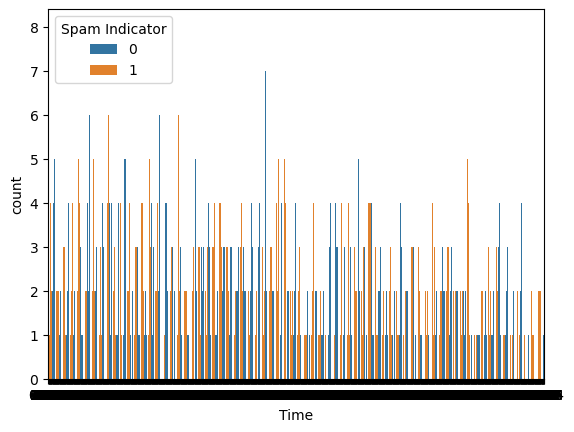

In [13]:
sns.countplot(data=E_data ,x='Time', hue ='Spam Indicator')

<AxesSubplot:xlabel='Attachments', ylabel='count'>

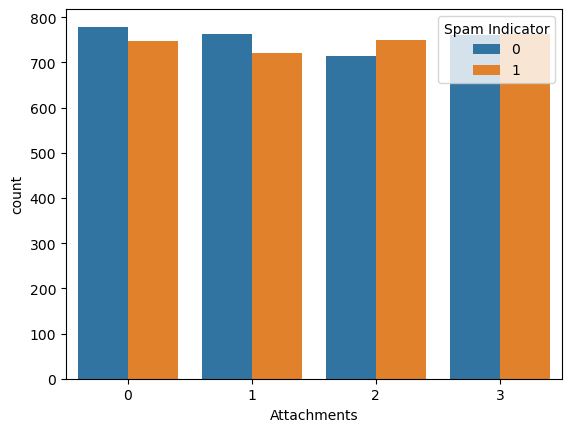

In [14]:
sns.countplot(data=E_data ,x='Attachments', hue ='Spam Indicator')

<AxesSubplot:xlabel='Link Count', ylabel='count'>

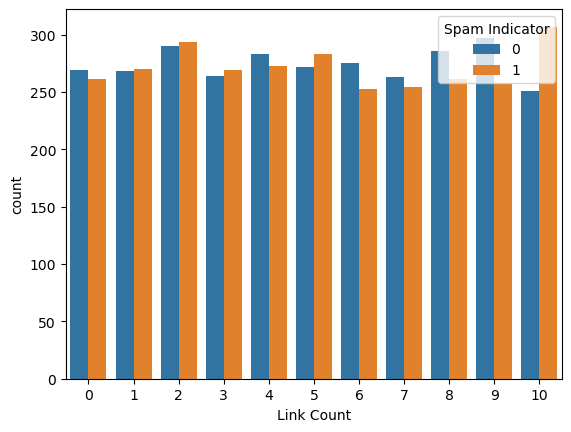

In [15]:
sns.countplot(data=E_data ,x='Link Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='Word Count', ylabel='count'>

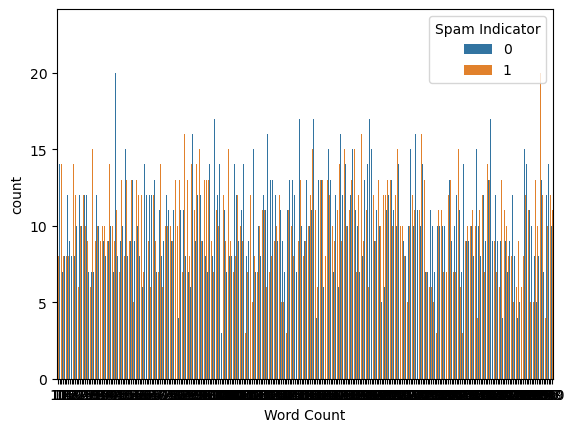

In [16]:
sns.countplot(data=E_data ,x='Word Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='Uppercase Count', ylabel='count'>

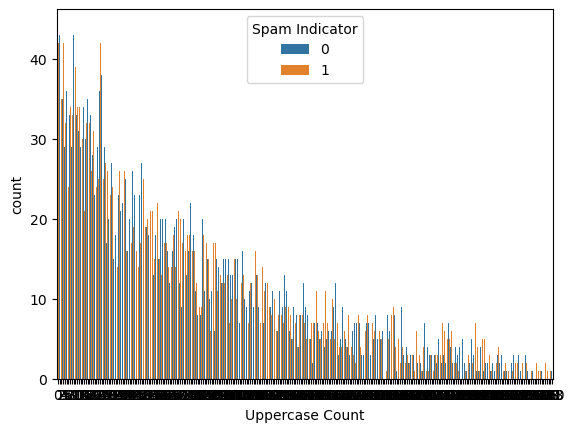

In [17]:
sns.countplot(data=E_data ,x='Uppercase Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='Uppercase Count', ylabel='count'>

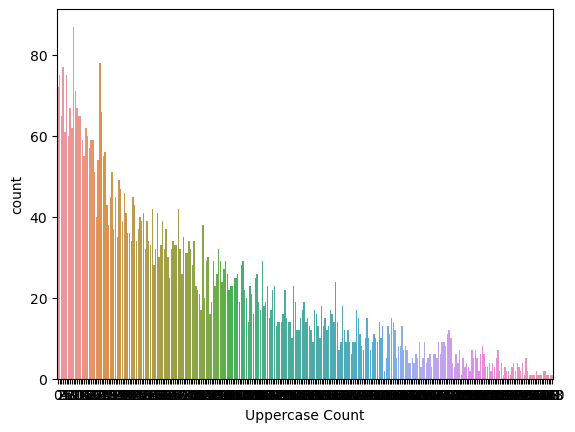

In [18]:
sns.countplot(data=E_data ,x='Uppercase Count')

<AxesSubplot:xlabel='Exclamation Count', ylabel='count'>

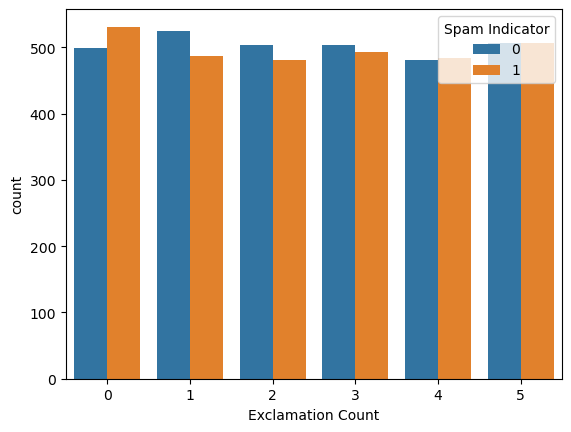

In [19]:
sns.countplot(data=E_data ,x='Exclamation Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='Question Count', ylabel='count'>

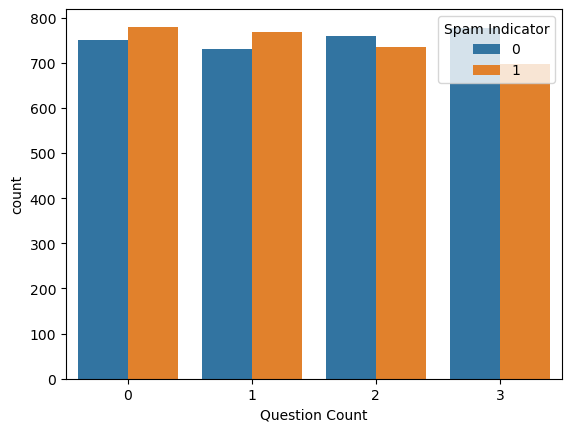

In [20]:
sns.countplot(data=E_data ,x='Question Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='Dollar Count', ylabel='count'>

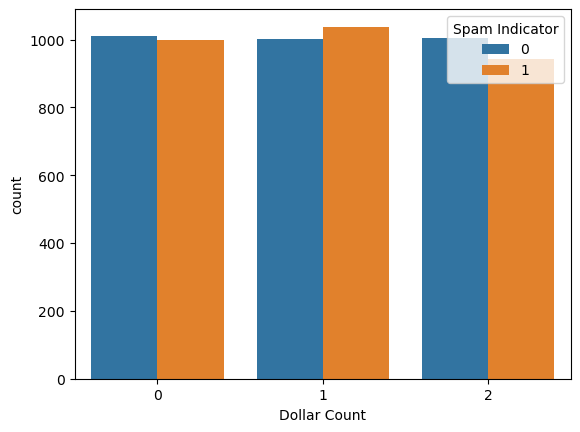

In [21]:
sns.countplot(data=E_data ,x='Dollar Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='Punctuation Count', ylabel='count'>

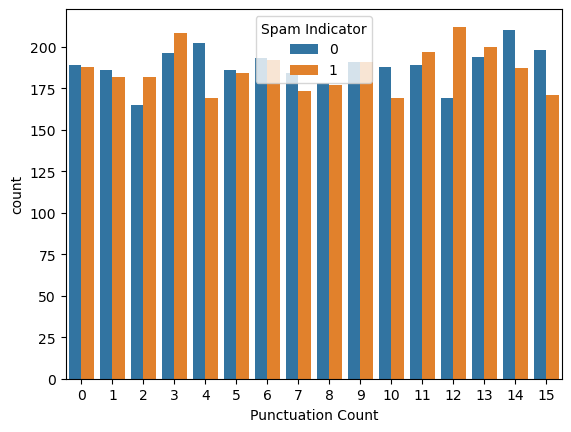

In [22]:
sns.countplot(data=E_data ,x='Punctuation Count', hue ='Spam Indicator')

<AxesSubplot:xlabel='HTML Tags Count', ylabel='count'>

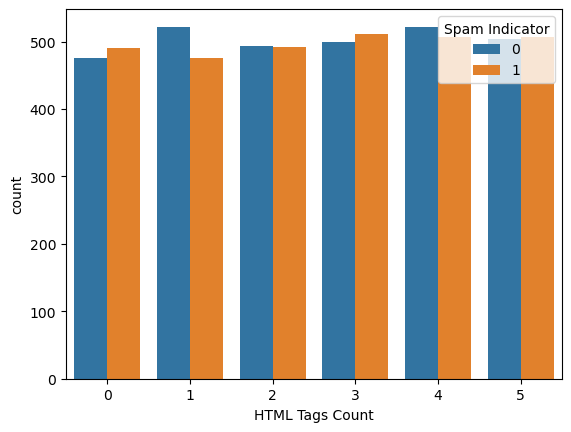

In [23]:
sns.countplot(data=E_data ,x='HTML Tags Count', hue ='Spam Indicator')

In [24]:
E_data.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [25]:
E_data.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


# Data Cleaning:

Drop columns that may not be useful for the spam classification task, such as 'Email', 'Subject', 'Sender', 'Recipient', 'Date', and 'Time'.

In [26]:
#drop columen
E_data.drop("Email" , axis=1 , inplace=True)
E_data.drop("Subject" , axis=1 , inplace=True)
E_data.drop("Sender" , axis=1 , inplace=True)
E_data.drop("Recipient" , axis=1 , inplace=True)
E_data.drop("Date" , axis=1 , inplace=True)
E_data.drop("Time" , axis=1 , inplace=True)

# Feature Selection:

# Select features (columns) that are likely to be relevant for spam classification.
# Features like 'Attachments', 'Link Count', 'Word Count', etc., are selected.

#or
#x=E_data.select_dtypes(include="int64")

In [27]:
type(E_data)

pandas.core.frame.DataFrame

In [28]:
categorical_variables = E_data.select_dtypes(include=['object', 'category'])

In [29]:
categorical_variables

""
0
1
2
3
4
...
5995
5996
5997
5998


In [30]:
E_data

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32,3,3,0,11,1,1
1,3,9,45,1,2,1,2,8,2,1
2,3,9,52,1,4,0,2,10,1,1
3,2,3,75,6,0,2,0,8,2,0
4,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5,0
5996,1,5,19,10,0,0,1,7,0,0
5997,2,10,52,45,5,3,0,10,4,0
5998,3,2,178,76,0,1,2,11,1,1


In [31]:
unique_counts = E_data.nunique()

In [32]:
unique_counts

Attachments            4
Link Count            11
Word Count           291
Uppercase Count      284
Exclamation Count      6
Question Count         4
Dollar Count           3
Punctuation Count     16
HTML Tags Count        6
Spam Indicator         2
dtype: int64

In [33]:
y = E_data[["Spam Indicator"]]

In [34]:
y

,Spam Indicator
0,1
1,1
2,1
3,0
4,1
...,...
5995,0
5996,0
5997,0
5998,1


In [35]:
x = E_data[['Attachments','Link Count','Word Count','Uppercase Count','Exclamation Count',
            'Question Count','Dollar Count','Punctuation Count','HTML Tags Count']]

In [36]:
x

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
0,3,0,191,32,3,3,0,11,1
1,3,9,45,1,2,1,2,8,2
2,3,9,52,1,4,0,2,10,1
3,2,3,75,6,0,2,0,8,2
4,3,5,299,279,0,2,0,6,1
...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5
5996,1,5,19,10,0,0,1,7,0
5997,2,10,52,45,5,3,0,10,4
5998,3,2,178,76,0,1,2,11,1


# Machine Learning with Random Forest:

Import RandomForestClassifier from scikit-learn.

Split the data into training and testing sets using train_test_split.

Create a random forest classifier (reg) and fit it to the training data.

Make predictions on the test data and calculate the model's accuracy.

Evaluate the model using a confusion matrix.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
reg = RandomForestClassifier()

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
reg.fit(x_train,y_train)

C:\Users\rajes\AppData\Local\Temp\ipykernel_14228\310678519.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train,y_train)


RandomForestClassifier()

# Model Evaluation:

Make predictions on the test data using model.predict(x_test) and store them in y_pred.

Calculate the confusion matrix using confusion_matrix to measure the number of true positives, true negatives, false positives, and false negatives.

Calculate the accuracy of the model using accuracy_score from scikit-learn.

In [42]:
y_pred=reg.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [43]:
reg.score(x_train,y_train)

1.0

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5083333333333333


# What is a confusion matrix?
It is a table that is used in classification problems to assess where errors in the model were made. The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made

In [50]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test,y_pred)

array([[339, 263],
       [327, 271]], dtype=int64)

# Machine Learning with Logistic Regression:

Import LogisticRegression from scikit-learn.

Split the data into training and testing sets again.

Create a logistic regression model (model) and fit it to the training data.

Make predictions on the test data and calculate the model's accuracy.

Evaluate the model using a confusion matrix.

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=20)

In [55]:
model=LogisticRegression()

In [56]:
model.fit(x_train,y_train)

C:\Mechanical\python anconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Mechanical\python anconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [58]:
model.coef_

array([[ 2.18390863e-02,  6.34202512e-03, -1.33648313e-04,
        -3.14356081e-06,  6.45316222e-03, -4.48669222e-02,
        -5.43605766e-02, -5.27438805e-03,  1.53875062e-02]])

In [59]:
model.intercept_

array([0.01222914])

In [62]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,y_pred)

array([[305, 259],
       [361, 275]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48333333333333334
